In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans, Birch
from scipy.cluster.hierarchy import dendrogram

import re
import string
import time
from PIL import Image
from collections import Counter

import plotly.express as px

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

nltk.download('stopwords', download_dir='./resources')
nltk.download('punkt', download_dir='./resources')
nltk.download('wordnet', download_dir='./resources')
nltk.download('omw-1.4', download_dir='./resources')
nltk.download('words', download_dir='./resources')
nltk.data.path.append('./resources')

[nltk_data] Downloading package stopwords to ./resources...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ./resources...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ./resources...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ./resources...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to ./resources...
[nltk_data]   Package words is already up-to-date!


In [2]:
data = pd.read_csv('./Data/updated/punctuation_stopwords.csv')
data

combined
0     ukraine angry zelensky vows punish russian atr...
1     war ukraine taking cover town attack jeremy bo...
2     ukraine war catastrophic global food one world...
3     manchester arena bombing saffie roussoss paren...
4     ukraine conflict oil price soars highest level...
...                                                 ...
7359  premiership harlequins 2730 saracens sarries w...
7360  queue expert helped plan thousands people line...
7361  cowboy queen bonded horses sitting heads state...
7362  queen amused americans breach protocol monarch...
7363  queen elizabeth iis special connection windsor...

[7364 rows x 1 columns]

## Vectorization

In [3]:
cv = CountVectorizer(analyzer='word')
cv_data = cv.fit_transform(data['combined'])
dtm_data = pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names_out())
dtm_data.index = data.index
dtm_data.head(5)

10  100  1000  10000  100000  10000m  1000yearold  100bn  100ft  100hour  \
0   0    0     0      0       0       0            0      0      0        0   
1   0    0     0      0       0       0            0      0      0        0   
2   0    0     0      0       0       0            0      0      0        0   
3   0    0     0      0       0       0            0      0      0        0   
4   0    0     0      0       0       0            0      0      0        0   

   ...  zoom  zoos  zsl  zuckerberg  zulu  zurich  zuu  zverev  zwelithini  \
0  ...     0     0    0           0     0       0    0       0           0   
1  ...     0     0    0           0     0       0    0       0           0   
2  ...     0     0    0           0     0       0    0       0           0   
3  ...     0     0    0           0     0       0    0       0           0   
4  ...     0     0    0           0     0       0    0       0           0   

   úsuga  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 18487 columns]

In [4]:
word_freq_data_normalized = dtm_data.T
word_freq_data_normalized

0     1     2     3     4     5     6     7     8     9     ...  \
10             0     0     0     0     0     0     0     0     0     0  ...   
100            0     0     0     0     0     0     0     0     0     0  ...   
1000           0     0     0     0     0     0     0     0     0     0  ...   
10000          0     0     0     0     0     0     0     0     0     0  ...   
100000         0     0     0     0     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
zurich         0     0     0     0     0     0     0     0     0     0  ...   
zuu            0     0     0     0     0     0     0     0     0     0  ...   
zverev         0     0     0     0     0     0     0     0     0     0  ...   
zwelithini     0     0     0     0     0     0     0     0     0     0  ...   
úsuga          0     0     0     0     0     0     0     0     0     0  ...   

            7354  7355  7356  7357  7358  7359  7360  7361  7362  7363  
10             0     0     0     0     0     0     0     0     0     0  
100            0     0     0     0     0     0     0     0     0     0  
1000           0     0     0     0     0     0     0     0     0     0  
10000          0     0     0     0     0     0     0     0     0     0  
100000         0     0     0     0     0     0     0     0     0     0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
zurich         0     0     0     0     0     0     0     0     0     0  
zuu            0     0     0     0     0     0     0     0     0     0  
zverev         0     0     0     0     0     0     0     0     0     0  
zwelithini     0     0     0     0     0     0     0     0     0     0  
úsuga          0     0     0     0     0     0     0     0     0     0  

[18487 rows x 7364 columns]

In [5]:
word_freq_data = pd.DataFrame(word_freq_data_normalized.sum(axis=1).reset_index()).rename(columns={'index': 'word', 0: 'freq'})
word_freq_data

word  freq
0              10   115
1             100    34
2            1000    17
3           10000    10
4          100000     7
...           ...   ...
18482      zurich     5
18483         zuu     2
18484      zverev     4
18485  zwelithini     2
18486       úsuga     1

[18487 rows x 2 columns]

In [6]:
TRIM_QUANTILE = 0.7
word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]

word  freq
0          10   115
1         100    34
2        1000    17
3       10000    10
4      100000     7
...       ...   ...
18469     zoe     5
18473    zone    10
18475     zoo    13
18482  zurich     5
18484  zverev     4

[5956 rows x 2 columns]

In [7]:
stopwords = list(word_freq_data[word_freq_data['freq'] < word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])
vec_vocab = list(word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])

In [8]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, vocabulary=vec_vocab)
tfidf_vectorizer

TfidfVectorizer(stop_words=['1000yearold', '100bn', '100ft', '100hour', '100k',
                            '100run', '100th', '100year', '100yearold', '102',
                            '103', '10300', '1038', '103rd', '1049', '104f',
                            '104th', '105', '105m', '105yearold', '1062',
                            '1066', '106run', '107', '1084', '109', '1095',
                            '1099', '109point', '109run', ...],
                vocabulary=['10', '100', '1000', '10000', '100000', '10000m',
                            '100m', '101', '104', '10bn', '10m', '10man',
                            '10th', '11', '12', '12yearold', '13', '130', '14',
                            '14th', '14yearold', '15', '150', '1500m', '150th',
                            '15m', '15yearold', '16', '17', '17th', ...])

In [9]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined'])
tfidf_matrix

<7364x5956 sparse matrix of type '<class 'numpy.float64'>'
	with 100482 stored elements in Compressed Sparse Row format>

In [10]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

0     1     2     3     4     5     6     7     8     9     ...  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
7359   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7360   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7361   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7362   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
7363   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

          5946  5947  5948  5949  5950  5951  5952  5953  5954  5955  
0     0.263341   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1     0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2     0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3     0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4     0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
7359  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7360  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7361  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7362  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7363  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7364 rows x 5956 columns]

In [11]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['10', '100', '1000', ..., 'zoo', 'zurich', 'zverev'], dtype=object)

In [12]:
tfidf_data.columns = feature_names
tfidf_data

10  100  1000  10000  100000  10000m  100m  101  104  10bn  ...  \
0     0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
1     0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
2     0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
3     0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
4     0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
...   ...  ...   ...    ...     ...     ...   ...  ...  ...   ...  ...   
7359  0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
7360  0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
7361  0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
7362  0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   
7363  0.0  0.0   0.0    0.0     0.0     0.0   0.0  0.0  0.0   0.0  ...   

      zelensky  zelenskys  zero  zerocovid  zinchenko  zoe  zone  zoo  zurich  \
0     0.263341        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
1     0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
2     0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
3     0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
4     0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
...        ...        ...   ...        ...        ...  ...   ...  ...     ...   
7359  0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
7360  0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
7361  0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
7362  0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   
7363  0.000000        0.0   0.0        0.0        0.0  0.0   0.0  0.0     0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
7359     0.0  
7360     0.0  
7361     0.0  
7362     0.0  
7363     0.0  

[7364 rows x 5956 columns]

# Truncated SVD

In [13]:
tsvd = TruncatedSVD(n_components=100, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 0.20404268, -0.12076479, -0.03528195, ...,  0.02833654,
         0.04185142,  0.01607782],
       [ 0.18316309, -0.13803967, -0.06169975, ..., -0.03519254,
        -0.01036744, -0.00967831],
       [ 0.22339139, -0.09363644,  0.00065301, ..., -0.03245608,
         0.03365915,  0.00691794],
       ...,
       [ 0.02573565,  0.019711  ,  0.03838985, ...,  0.02669261,
        -0.02004833,  0.02037802],
       [ 0.03623838,  0.0203716 ,  0.03166285, ..., -0.00225742,
        -0.00382494,  0.0100144 ],
       [ 0.03166081,  0.03021773,  0.01930855, ...,  0.0303089 ,
        -0.01639681,  0.02491475]])

In [14]:
pd.DataFrame(vec_matrix_tsvd)

0         1         2         3         4         5         6   \
0     0.204043 -0.120765 -0.035282 -0.002540  0.002940 -0.008940  0.007878   
1     0.183163 -0.138040 -0.061700 -0.007380  0.015091  0.010984  0.009918   
2     0.223391 -0.093636  0.000653 -0.015491 -0.052747 -0.039380 -0.065195   
3     0.049812  0.027614 -0.003375  0.111031 -0.016547 -0.015628  0.012187   
4     0.123416 -0.043078  0.074560 -0.030968 -0.032434 -0.072738 -0.122345   
...        ...       ...       ...       ...       ...       ...       ...   
7359  0.034542  0.047005 -0.020149  0.030174  0.012000  0.005764  0.001572   
7360  0.059922  0.024268  0.072967  0.014854 -0.111209  0.097239  0.090159   
7361  0.025736  0.019711  0.038390  0.010101 -0.045819  0.109000  0.116134   
7362  0.036238  0.020372  0.031663  0.010508 -0.056574  0.097655  0.067018   
7363  0.031661  0.030218  0.019309  0.015759 -0.058993  0.124332  0.115996   

            7         8         9   ...        90        91        92  \
0     0.024800 -0.017891  0.014421  ... -0.012873 -0.048052  0.042394   
1    -0.021192 -0.008846  0.010874  ... -0.000232  0.031003 -0.005719   
2    -0.017536  0.027078 -0.034901  ... -0.063583  0.011448  0.029322   
3    -0.024208 -0.025150  0.022983  ... -0.022133  0.027836 -0.048457   
4    -0.088535  0.036625 -0.125056  ...  0.028879 -0.014194  0.047858   
...        ...       ...       ...  ...       ...       ...       ...   
7359  0.001844 -0.008560 -0.007782  ...  0.014864 -0.007789 -0.014934   
7360 -0.099504  0.015673  0.024976  ... -0.027060 -0.003697 -0.017872   
7361 -0.061292  0.016748  0.009429  ...  0.021437  0.010218  0.029822   
7362  0.024340  0.024270  0.003832  ... -0.007242 -0.000187  0.009590   
7363 -0.062751  0.017943  0.006523  ...  0.005172 -0.030364  0.027720   

            93        94        95        96        97        98        99  
0    -0.023102  0.000745  0.018553  0.008333  0.028337  0.041851  0.016078  
1     0.048095 -0.008829  0.017198 -0.025246 -0.035193 -0.010367 -0.009678  
2    -0.067136  0.032503 -0.046627  0.048210 -0.032456  0.033659  0.006918  
3     0.048646 -0.038496 -0.026348  0.008787 -0.068820  0.001359 -0.010890  
4     0.058077  0.016791 -0.018588 -0.028678 -0.017882  0.013860 -0.018274  
...        ...       ...       ...       ...       ...       ...       ...  
7359  0.017920 -0.033520 -0.006654  0.021681  0.005064  0.012328  0.004995  
7360  0.009443 -0.026853  0.038372  0.031692  0.019156 -0.028988  0.033098  
7361 -0.017471 -0.041028 -0.001794 -0.067677  0.026693 -0.020048  0.020378  
7362 -0.013188  0.008180  0.008350  0.004303 -0.002257 -0.003825  0.010014  
7363 -0.004239  0.004409 -0.014170  0.001785  0.030309 -0.016397  0.024915  

[7364 rows x 100 columns]

In [15]:
BATCH_SIZE = 10

In [16]:
kmeans_clst = MiniBatchKMeans(n_clusters=5, random_state=37, batch_size=10)
kmeans_clst = kmeans_clst.partial_fit(vec_matrix_tsvd)

In [17]:
kmeans_clst.cluster_centers_

array([[ 7.25269550e-02,  2.22623013e-02,  1.37004941e-02,
         8.42090800e-03, -8.47209680e-03,  6.23511570e-03,
        -2.30634447e-03,  1.37735029e-03,  4.83661232e-04,
         4.80250959e-03, -4.30806078e-04, -2.72569007e-03,
         1.90999596e-03, -2.82028703e-03, -4.71432351e-04,
        -1.80189724e-03,  1.36374324e-03,  4.52982748e-04,
         2.60994967e-03,  6.57699169e-04,  6.87701230e-04,
        -4.34750652e-04,  1.12166671e-03,  2.53149117e-03,
         1.85387945e-04,  1.51668484e-03,  9.17061917e-04,
         5.96133393e-04,  1.02236808e-03, -8.89973169e-05,
         3.17411224e-04, -1.58223419e-03,  1.60579111e-03,
         5.15006583e-04,  4.31443701e-05, -3.74737826e-06,
        -1.19677178e-03, -7.42936010e-04, -3.43272964e-04,
         4.13185795e-04,  1.82293334e-03, -1.90556482e-03,
        -6.87900052e-04,  1.03530850e-03, -2.31973219e-04,
         8.03035159e-04,  8.56800710e-04,  2.10622565e-04,
         2.92157189e-03, -3.23928779e-05,  1.19671194e-0

In [18]:
kmeans_clst.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
data['kmeans_label'] = kmeans_clst.labels_

# Visualizing results

In [20]:
tsvd_centers = TruncatedSVD(n_components=2, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d2_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d2_points = tsvd_centers.transform(vec_matrix_tsvd)

In [21]:
tsvd_centers = TruncatedSVD(n_components=3, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d3_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d3_points = tsvd_centers.transform(vec_matrix_tsvd)

In [22]:
d2_centers

array([[ 0.02611627,  0.02608269],
       [ 0.02396957, -0.00204949],
       [ 0.06492133,  0.21498036],
       [ 0.07437282,  0.4040012 ],
       [ 0.54938774, -0.08124604]])

In [23]:
d2_points

array([[-0.00481542,  0.13549969],
       [ 0.03686696,  0.11683056],
       [ 0.03186327,  0.18757333],
       ...,
       [ 0.13054522, -0.03259633],
       [ 0.09129618,  0.00492858],
       [ 0.10889044, -0.03478026]])

In [24]:
sns.set_style('darkgrid')

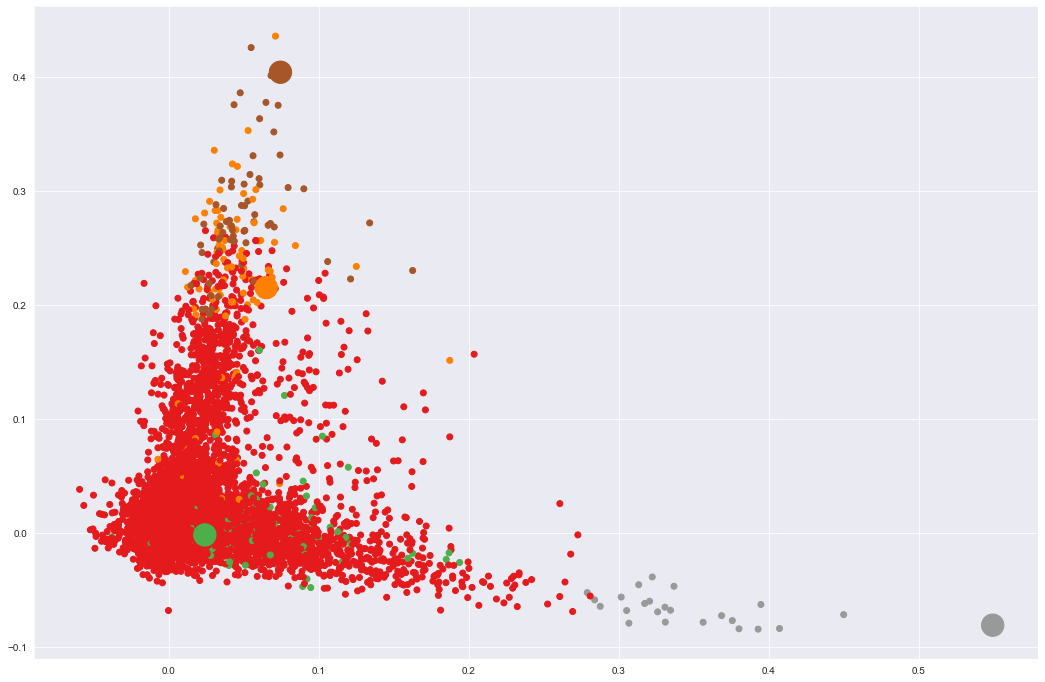

In [25]:
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=kmeans_clst.labels_, cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=np.unique(kmeans_clst.labels_), s=[500, 500, 500, 500, 500], cmap='Set1')

In [26]:
fig_centers = px.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], color=np.unique(kmeans_clst.labels_), size=[500, 500, 500, 500, 500])
fig_points = px.scatter(x=d2_points[:, 0], y=d2_points[:, 1], color=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data)
fig.add_traces(fig_points.data)
fig.show()

In [27]:
fig_centers = px.scatter_3d(x=d3_centers[:, 0], y=d3_centers[:, 1], z=d3_centers[:, 2], color=np.unique(kmeans_clst.labels_), size=[50, 50, 50, 50, 50], size_max=50)
fig_points = px.scatter_3d(x=d3_points[:, 0], y=d3_points[:, 1], z=d3_points[:, 2], color=kmeans_clst.labels_, symbol=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data + fig_points.data)
fig.show()

In [28]:
def to_viz_data(data, tfidf_data, labels):
    transformed_data = []
    for label in labels:
        new_data = tfidf_data[tfidf_data[data['label'] == label].idxmax(axis=1)].max()[:200]
        transformed_data.append(pd.concat([new_data.reset_index(), pd.Series([label] * len(new_data))], axis=1))
    viz_data = pd.concat(transformed_data)
    viz_data.columns = ['word', 'tfidf', 'label']
    return viz_data

In [29]:
viz_data = to_viz_data(data.rename({'kmeans_label': 'label'}, axis=1), tfidf_data, data['kmeans_label'].unique())
viz_data

word     tfidf  label
0      forgive  0.374883      0
1       jeremy  0.317005      0
2         food  0.558384      0
3        arena  0.516358      0
4        soars  0.374702      0
..         ...       ...    ...
19   elizabeth  0.476860      4
20       queen  0.506502      4
21  buckingham  0.526044      4
22   elizabeth  0.476860      4
23          ii  0.447265      4

[590 rows x 3 columns]

In [30]:
def visualize_clusters(viz_data):
    viz_data = viz_data.copy()
    viz_data['label'] += np.abs(viz_data['label'].min())
    viz_data = viz_data.sort_values('label').groupby('label').head(20)
    fig = px.scatter(viz_data, x='label', y='tfidf', color='label', text='word', hover_data=['label', 'tfidf', 'word'])
    fig.update_layout(
        font=dict(
            family='Courier New, monospace',
            size=18,  # Set the font size here
            color='black'
        ),
        xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1
        ),
        yaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 0.05
        )
    )
    text_fonts = (np.e**(viz_data['tfidf'] * 4.5)).astype(int)
    fig.update_traces(mode='text', selector=dict(type='scatter'), textfont_size=(text_fonts).values)
    fig.for_each_trace(lambda t: t.update(textfont_color=np.array(px.colors.qualitative.Dark24)[t.marker.color], textposition='bottom center'))
    fig.show()

In [31]:
visualize_clusters(viz_data)